Student Perfomance Indicator


Life cycle of machine learning prject

Problem Statement

This project understands how the student's perfomance is affected by other variables such as Gender, Ethinicity, Parental level of education Lunch and Test preparation 
Course

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.nunique()


gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [6]:
## check stastickes of data set 

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable: ", end=" ") 
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable: ", end=" ")
print(df['parental level of education'].unique())   

print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique()) 

print("Categories in 'test preparation course' variable: ", end=" ")
print(df['test preparation course'].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [17]:
## define the numerical  & categorical columns

numeric_features = [ feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [ feature for feature in df.columns if df[feature].dtype == 'O' ]


#print columns

print('We have {} numerivcal features and {} categorical features'.format(len(numeric_features), len(categorical_features)))
print('\n We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 5 numerivcal features and 5 categorical features

 We have 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average score'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [22]:
reading_full = df[df['reading score'] == 100]['average score'].count()
writing_full = df[df['writing score'] == 100]['average score'].count()
math_full = df[df['math score'] == 100]['average score'].count()

print(f"Number of students who scored full marks in reading: {reading_full}")
print(f"Number of students who scored full marks in writing: {writing_full}")
print(f"Number of students who scored full marks in math: {math_full}")


Number of students who scored full marks in reading: 17
Number of students who scored full marks in writing: 14
Number of students who scored full marks in math: 7


In [27]:
reading_less = df[df['reading score'] <= 20]['average score'].count()
writing_less = df[df['writing score'] <= 20]['average score'].count()    
math_less = df[df['math score'] <= 20]['average score'].count()


print(f"Number of students who scored less marks in reading: {reading_full}")
print(f"Number of students who scored less marks in writing: {writing_full}")
print(f"Number of students who scored less marks in math: {math_full}")

Number of students who scored less marks in reading: 17
Number of students who scored less marks in writing: 14
Number of students who scored less marks in math: 7


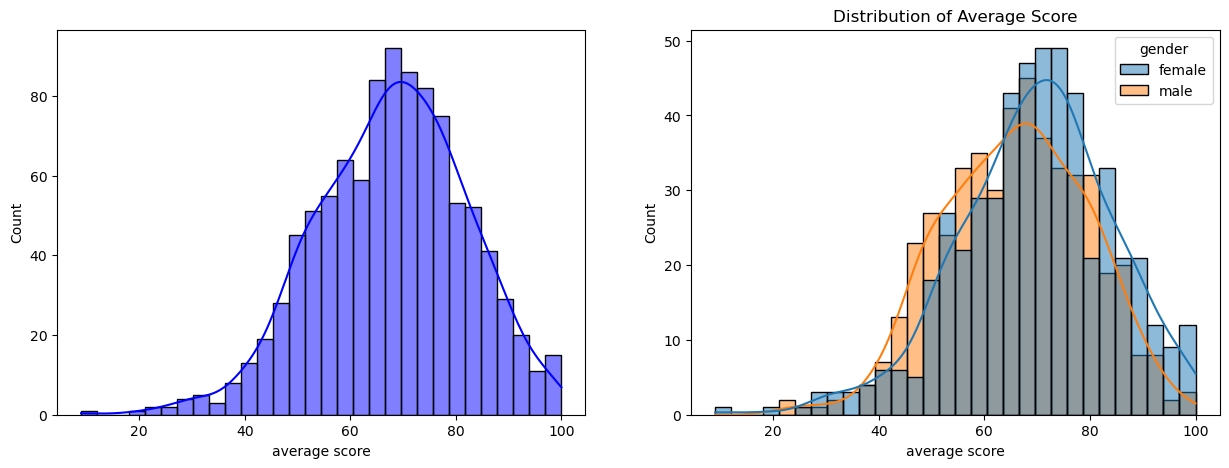

In [33]:
## histogram of average score

fig, axs = plt.subplots(1, 2, figsize = (15, 5) )
plt.subplot(121)
sns.histplot(data = df , x = 'average score',bins= 30,  kde = True, color = 'blue')
plt.subplot(122)
plt.title('Distribution of Average Score')
sns.histplot(data = df , x = 'average score',bins= 30,  kde = True, color = 'green', hue='gender')
plt.show()